In [2]:
from Pysces import *

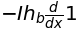

In [3]:
P_OPERATOR(x)

Issue: the above commutator has "1" as a placeholder.

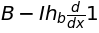

In [4]:
P_OPERATOR(x)*B

We want the "B" to automatically replace the "1" in the Derivative() function.


_______________________________________________________________________________________________________________________________


# *Food for thought: Are there general instances where we need to change the derivatives? Or do we only need the change in specific cases (i.e. Expectation values)?*

_______________________________________________________________________________________________________________________________

### sympy derivative is defined as:

class Derivative(sympy.core.expr.Expr)

 |  "Derivative(expr, *variables, **kwargs)"
 
#### Variables and kwargs are optional arguments, expr. (expression) is not...

Therefore, it looks like it needs something in that position... Is it possible to automatically change this expression from the placeholder, "1", to the expression of interest?

This is important for expectation values, for example.

# *General Replacements*

## Option One:

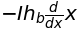

In [5]:
def P_OPERATOR(x, B = None):
    h_b = Symbol("h_b")
    if B == None:
        return Operator(-I*h_b*(Derivative("1", x)))
    else:
        return Operator(-I*h_b*(Derivative(B, x)))
    
P_OPERATOR(x, x)

This option involves having multiple parameters for the operators themselves. However, it also involves understanding how an expression is set up... Maybe look into an if/else statement that involves replacements, similar to the EXPRESSION_REPLACE() function already defined.

More specifically, the if/else statement should be able to replace two functions with the redefined P_OPERATOR function with two parameters.

This could be done with strings.

# Option Two:

### This one is similar to the EXPRESSION_REPLACE function, but can only be used if there is one derivative present. (So, not possible with commutators)

In [6]:
def OPERATOR_REPLACE(R, B, K):
    if K == x:
        return sympify(str(R).replace(str(1), str(B))).doit()

In [7]:
OPERATOR_REPLACE(P_OPERATOR(x), x**3, x)

#### For reference, this is how the EXPRESSION_REPLACE function works:

In [8]:
str(COMM(P_OPERATOR(x), x, F(x))).replace(str('Derivative(1, x)*x*F(x)'), str(Derivative(x*F(x), x)))

'-x*-I*h_b*Derivative(1, x)*F(x) - I*h_b*Derivative(x*F(x), x)'

Why does it need to be in quotes? - I think this has to do with length of the string...?

# The EXPECTATION function was then redefined.

Look into the expectation value in regards to the kinetic energy:

Can be done all in one line: 

In [135]:
EXPECTATION(PIB_NORMALIZE(x, L, n), KINETIC_ENERGY(x), x, 0, L).doit()

⎧ 2    2  2             
⎪π ⋅h_b ⋅n       π⋅n    
⎪──────────  for ─── ≠ 0
⎨     2           L     
⎪  2⋅L ⋅m               
⎪                       
⎩    0        otherwise 